In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Object(object): pass

Create an object where we store all our variables (to avoid) polluting global namespace.

In [17]:
conv = Object()

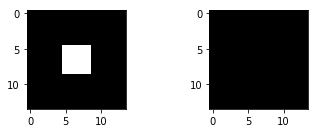

In [31]:
conv.square_center = np.zeros((14, 14))
for r in range(5, 9):
    conv.square_center[r, 5:9] = 255
conv.black = np.zeros((14, 14))

plt.subplot(2, 2, 1)
plt.imshow(conv.square_center, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(conv.black, cmap="gray")

Write code to detect if there's a white swa

In [32]:
def detect_white(img):
    h = img.shape[0]
    w = img.shape[1]
    return 1 if img[h//2, w//2] > 127 else 0

In [33]:
detect_white(conv.black)

0

In [34]:
detect_white(conv.square_center)

1

In [61]:
conv.vert_line = np.zeros((14, 14))
conv.vert_line[:, 6] = 255
conv.vert_line

array([[  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,
          0.,   0

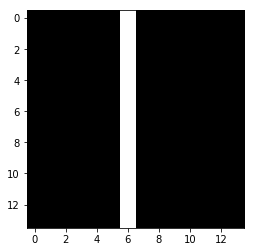

In [62]:
plt.imshow(conv.vert_line, cmap="gray")

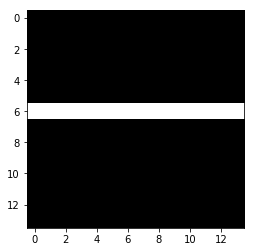

In [63]:
conv.horiz_line = np.zeros((14, 14))
conv.horiz_line[6,:] = 255
plt.imshow(conv.horiz_line, cmap="gray")

## Filters

In [69]:
conv.vert_filter = np.zeros((5, 5))
conv.vert_filter[:,:] = -1
conv.vert_filter[:, 2] = 1.0
conv.vert_filter

array([[-1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1.]])

## Apply filter

In [87]:
def apply_filter(img, flt):
    end = img.shape[0] - flt.shape[0] + 1
    ret = np.zeros((img.shape[0]-flt.shape[0] + 1, img.shape[1]-flt.shape[1] + 1))
    for y in range(0, end):
        for x in range(0, end):
            # Apply filter
            result = 0
            for y1 in range(flt.shape[0]):
                for x1 in range(flt.shape[1]):
                    result += img[y + y1, x + x1] * flt[y1, x1]
            ret[y, x] = result / (flt.shape[0] * flt.shape[1])
    return ret

In [88]:
apply_filter(conv.vert_line, conv.vert_filter)

array([[  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.],
       [  0.,   0., -51., -51.,  51., -51., -51.,   0.,   0.,   0.]])

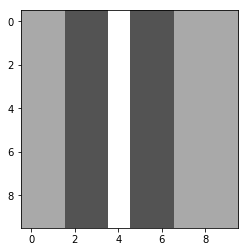

In [89]:
plt.imshow(apply_filter(conv.vert_line, conv.vert_filter), cmap="gray", vmin=-100, vmax=51)

In [90]:
apply_filter(conv.horiz_line, conv.vert_filter)

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [-30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6,
        -30.6],
       [-30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6,
        -30.6],
       [-30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6,
        -30.6],
       [-30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6,
        -30.6],
       [-30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6, -30.6,
        -30.6],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ]])

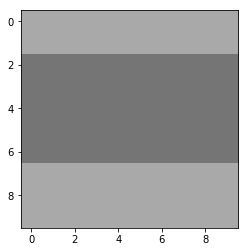

In [91]:
plt.imshow(apply_filter(conv.horiz_line, conv.vert_filter), cmap="gray", vmin=-100, vmax=51)

In [92]:
conv.horiz_filter = np.zeros((5, 5))
conv.horiz_filter[:,:] = -1
conv.horiz_filter[2,:] = 1
conv.horiz_filter

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]])

In [81]:
apply_filter(conv.vert_line, conv.horiz_filter)

array([[  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. , -30.6, -30.6, -30.6, -30.6, -30.6,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ]])

In [82]:
apply_filter(conv.horiz_line, conv.horiz_filter)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-51., -51., -51., -51., -51., -51., -51., -51., -51.,   0.],
       [-51., -51., -51., -51., -51., -51., -51., -51., -51.,   0.],
       [ 51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,   0.],
       [-51., -51., -51., -51., -51., -51., -51., -51., -51.,   0.],
       [-51., -51., -51., -51., -51., -51., -51., -51., -51.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [93]:
def detect_conv(img, flt):
    ret = apply_filter(img, flt)
    return 1 if ret.max() > 0 else 0

In [94]:
detect_conv(conv.horiz_line, conv.horiz_filter)

1

In [95]:
detect_conv(conv.vert_line, conv.vert_filter)

1

In [96]:
detect_conv(conv.vert_line, conv.horiz_filter)

0

## Non-linearity